# **Time Series Forecasting for Apple Stock Prediction**





# **Introduction**


##*  The dataset provided is a historical record of Apple Inc.'s (AAPL) stock prices and related metrics. This data includes
##* The Apple Finance Historical Data, spanning from 2015 to 2020, serves as a valuables

##*  The dataset provided is a historical record of Apple Inc.'s (AAPL) stock prices and related metrics. This data includes various features such as the date, opening and closing prices, highest and lowest prices of the day, trading volume, adjusted prices, dividends, and split factors. This rich dataset can be highly valuable for unsupervised machine learning techniques to uncover hidden patterns and insights without predefined labels or outcomes.



# **Inspiration and Benefits:**
#**1. Pattern Discovery**
##Unsupervised learning algorithms, such as clustering, can help identify patterns in stock price movements. For instance, grouping similar trading days together can reveal common market behaviors or anomalies. This can be particularly useful in understanding market cycles and predicting future price movements.

#**2. Anomaly Detection**
##Unsupervised learning techniques can detect anomalies or outliers in the stock price data. These anomalies could indicate unusual market conditions, significant events affecting stock performance, or potential errors in the data. Detecting these outliers early can be crucial for risk management and making timely investment decisions.

#**3. Feature Extraction**
##Dimensionality reduction techniques such as Principal Component Analysis (PCA) can be used to identify the most critical features impacting stock prices. This simplification can make data analysis more manageable and improve the performance of models used in subsequent predictive tasks.

#**4. Market Segmentation**
##Clustering can segment different market conditions, such as bullish or bearish trends. This segmentation can help traders and analysts devise more targeted strategies. Understanding these segments can lead to more effective trading strategies and better market timing.

#**5. Enhanced Understanding of Market Dynamics**
##By analyzing correlations and relationships between different features (e.g., volume and price movements), unsupervised learning can provide a deeper understanding of market dynamics and investor behavior. This understanding can aid in the development of more robust trading models and strategies.

#**6. Improved Portfolio Management**
##Unsupervised learning can assist in identifying the underlying structure of the stock market, which can be leveraged for better portfolio management. By understanding the relationships and patterns in the data, investors can optimize their portfolios to maximize returns and minimize risks.

#**7. Data Compression**
##Techniques like PCA can also be used for data compression, reducing the amount of data required to represent the stock prices effectively. This can save storage space and computational resources, making data handling more efficient.

#**8. Identifying Investment Opportunities**
##By discovering hidden patterns and trends in the stock data, unsupervised learning can help identify potential investment opportunities that may not be obvious through traditional analysis methods.

#**Description**

##**Date:** The specific trading day for which the stock data is recorded.

##**Opening Prices:** The price at which the stock opened trading on a particular day.

##**Closing Prices:** The price at which the stock closed trading on a particular day.

##**Highest Prices of the Day:** The highest price at which the stock traded during the day.

##**Lowest Prices of the Day:** The lowest price at which the stock traded during the day.

##**Trading Volume:** The total number of shares traded during the day.

##**Adjusted Prices:** The stock prices adjusted for corporate actions such as stock splits and dividends. This includes:

##**Dividends:** Cash dividends paid per share of stock on the ex-dividend date.

##**Split Factors:** Ratios used to adjust the number of shares and the stock price during stock splits.

In [ ]:
# importing all requring libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as tf
import datetime as dt
from datetime import date,timedelta
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AAPL.csv")

In [ ]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:

df.shape

(1258, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [ ]:
df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [ ]:
df.isnull().sum()

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df1 = df1[['date','close']]
df1.head()

,date,close
0,2015-05-27 00:00:00+00:00,132.045
1,2015-05-28 00:00:00+00:00,131.780
2,2015-05-29 00:00:00+00:00,130.280
3,2015-06-01 00:00:00+00:00,130.535
4,2015-06-02 00:00:00+00:00,129.960


In [ ]:
# Replace 'Date' with the actual name of your date column
df1['date'] = pd.to_datetime(df1['date'])
df1.head()

,date,close
0,2015-05-27 00:00:00+00:00,132.045
1,2015-05-28 00:00:00+00:00,131.780
2,2015-05-29 00:00:00+00:00,130.280
3,2015-06-01 00:00:00+00:00,130.535
4,2015-06-02 00:00:00+00:00,129.960


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    1258 non-null   datetime64[ns, UTC]
 1   close   1258 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 19.8 KB


In [ ]:
df1.columns

Index(['date', 'close'], dtype='object')

In [ ]:
df1.describe()

,close
count,1258.000000
mean,167.723998
std,56.850796
min,90.340000
25%,116.327500
50%,160.485000
75%,199.785000
max,327.200000


# **Visualize the time sereis data**

In [ ]:
#plot the data to see how it looks like using plotly
fig = px.line(df1, x='date', y='close', title='Apple Stock Predicton')
#fig.update_xaxes(tickformat="%d/%m/%Y")
fig.show()

In [ ]:
#plot the data to see how it looks like using plotly

fig=px.line(df,x='date',y=df1.columns,title="Stocks Price")
fig.show()

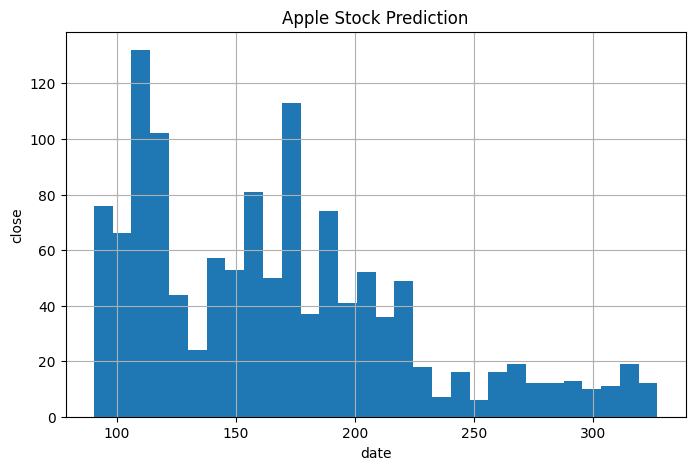

In [ ]:
#Histogram of Apple Stock daily trading volume
plt.figure(figsize=(8, 5))
plt.hist(df['close'], bins=30)
plt.title('Apple Stock Prediction')
plt.xlabel('date')
plt.ylabel('close')
plt.grid(True)
plt.show()

# **Checking the stationarity of data**

In [ ]:
result=adfuller(df1['close'])
print(result)

(-0.10012966467734342, 0.9494256168598446, 18, 1239, {'1%': -3.435638861796935, '5%': -2.863875547501718, '10%': -2.5680134763122906}, 6572.027548136161)


In [ ]:
from statsmodels.tsa.stattools import adfuller
#Ho-it is non stationary
#H1-it is stationary

def adfuller_test(close):
    result = adfuller(close)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for i, j in zip(result, labels):
        print(f'{j:25} = {i}')
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
              print("strong evidence against the null hypothesis(Ho) reject the null hypothesis, Data has no unit root and is stationary")
    else:
        print("weak evidence against the null hypothesis,time series has a unit root, indicating it is non-stationary")
adfuller_test(df1['close'])

ADF Test Statistic        = -0.10012966467734342
p-value                   = 0.9494256168598446
#Lags Used                = 18
Number of Observations Used = 1239
ADF Test Statistic : -0.10012966467734342
p-value : 0.9494256168598446
#Lags Used : 18
Number of Observations Used : 1239
weak evidence against the null hypothesis,time series has a unit root, indicating it is non-stationary


### By Seeing the above we states that our dataset is not in stationary, to make it stationary we use Differencing

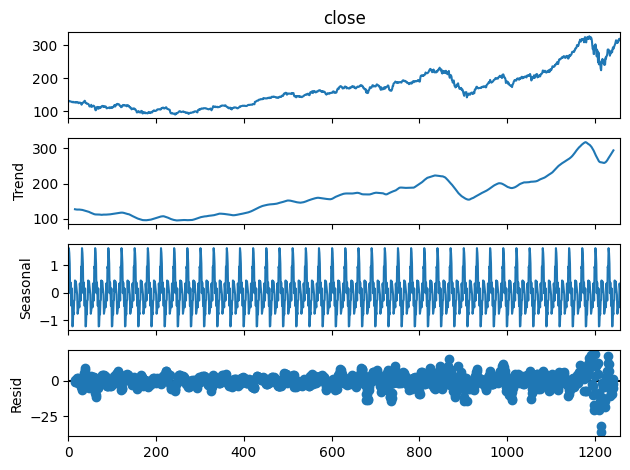

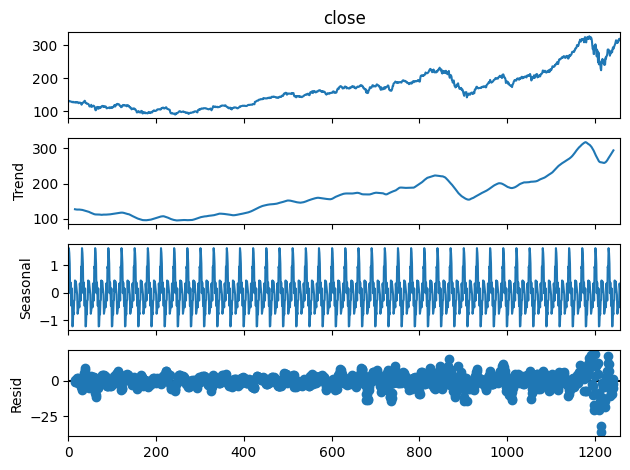

In [ ]:
# decompose the data to see the trend seasonality and noise

from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(df['close'],model='additive',period=30)
decompose.plot()

## The time series decomposition reveals that the observed data is characterized by a strong upward trend and a consistent seasonal pattern. The residual component shows random variations around zero, suggesting that the model has effectively captured the main trend and seasonal elements of the time series. This decomposition can help in understanding the underlying factors driving the changes in the data and in making more accurate predictions.

# **Auto regressive model**

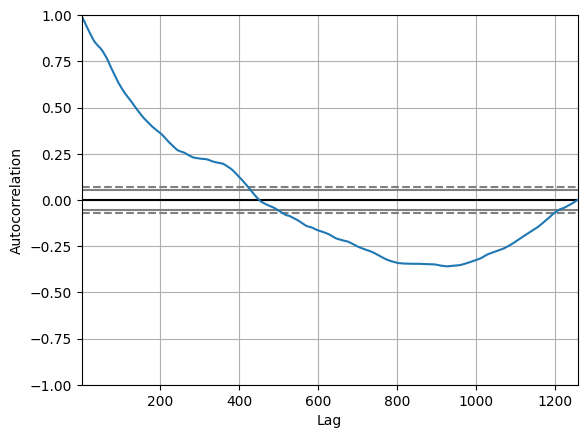

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['close'])
plt.show()

## The Auto regressive plot indicates a strong autocorrelation in the time series, with significant positive autocorrelation at lower lags, diminishing gradually as the lag increases. The presence of negative correlations at intermediate lags suggests cyclical patterns or periodicity in the data.

# **Differrencing**

In [ ]:
#first order differencing

df['Close First Difference'] = df['close'] - df['close'].shift(1)
df['Close First Difference'].head()

0      NaN
1   -0.265
2   -1.500
3    0.255
4   -0.575
Name: Close First Difference, dtype: float64

<Axes: >

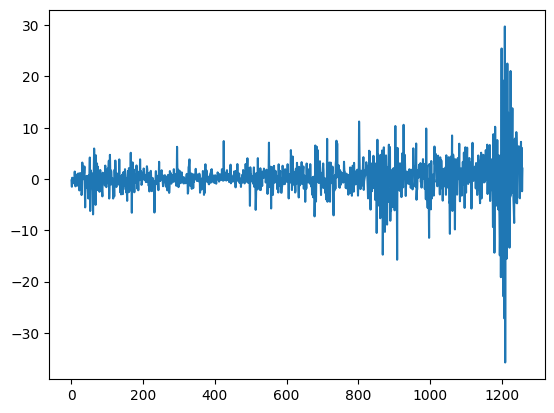

In [ ]:
#ploting the first order differencing

df['Close First Difference'].plot()

In [ ]:
df['Seasonal First Difference'] = df['close'] - df['close'].shift(12)
df['Seasonal First Difference'].head(15)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12   -4.875
13   -4.860
14   -2.680
Name: Seasonal First Difference, dtype: float64

<Axes: >

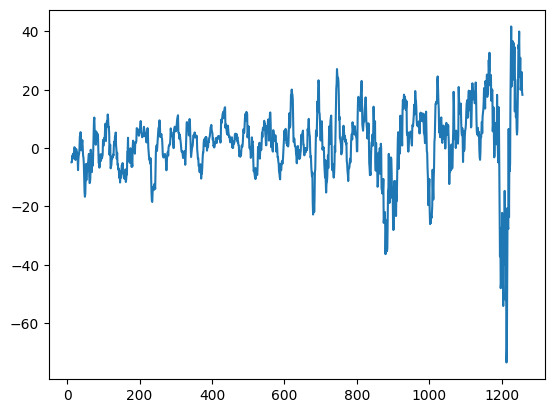

In [ ]:
# # ploting the seasonal first differencing

df['Seasonal First Difference'].plot()

### From this graph we have seen that the residuals are centered around zero with constant variance, supporting the assumption that they are random and normally distributed.

In [ ]:
# Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna()) # Use 'df' instead of 'df1'

ADF Test Statistic        = -7.548008252505303
p-value                   = 3.244605890137806e-11
#Lags Used                = 23
Number of Observations Used = 1222
ADF Test Statistic : -7.548008252505303
p-value : 3.244605890137806e-11
#Lags Used : 23
Number of Observations Used : 1222
strong evidence against the null hypothesis(Ho) reject the null hypothesis, Data has no unit root and is stationary


###By seeing this we conclude that our dataset is in stationary format



# ** Auto correlation and partial auto correlation**

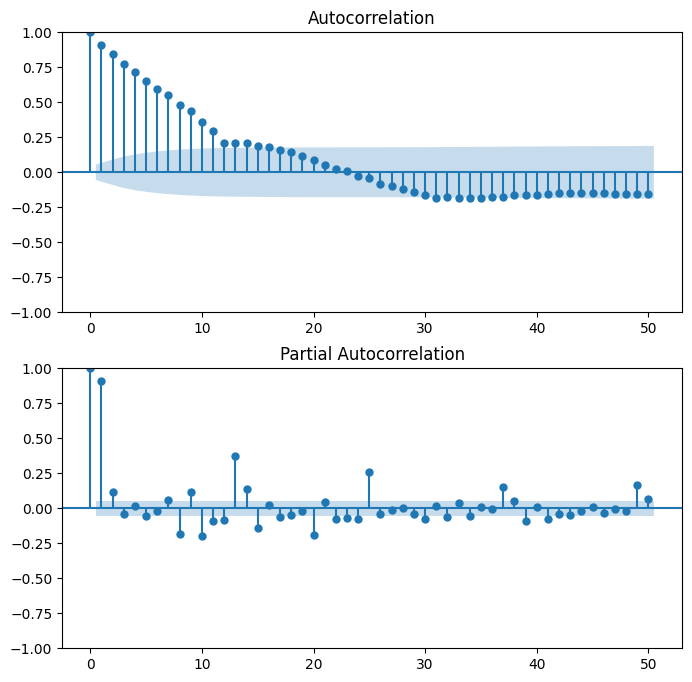

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=50, ax=ax2)

## **ACF :** The ACF graph indicates the presence of significant autocorrelation at lower lags, suggesting that recent past values have a strong influence on future values. The gradual decay and eventual crossing of zero indicate that this influence diminishes over time.

### **PACF :** The PACF graph is useful for identifying the appropriate lag order for the autoregressive (AR) part of the ARIMA model. Significant spikes at the initial lags, followed by values near zero, suggest that the series can be adequately modeled with a few autoregressive terms. The sharp drop-off after the initial lags indicates that including higher-order lags would not significantly improve the model. This helps in determining the AR component (p) in ARIMA modeling.

# **ARIMA MODEL**

In [ ]:
# lets run arima with pmdarima

# run this to see the best arima model
!pip install pmdarima
from pmdarima.arima import auto_arima
model=auto_arima(df['close'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore',suppress_warnings=True)
model.fit

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7473.892, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7186.707, Time=0.67 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.38 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7445.403, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7056.015, Time=2.22 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.64 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=7.60 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7092.115, Time=2.03 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=7055.034, Time=4.56 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=7184.138, Time=1.91 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=23.65 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=4.32 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=7057.000, Time=2.22 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=7057

<bound method ARIMA.fit of ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)>

In [ ]:
#summary of arima model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1258
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -3522.517
Date:                            Wed, 03 Jul 2024   AIC                           7055.034
Time:                                    19:12:41   BIC                           7080.669
Sample:                                         0   HQIC                          7064.673
                                           - 1258                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1715      0.014    -12.309      0.000      -0.199      -0.144
ar.L2          0.0498      0.012      4.097      0.000       0.026       0.074
ar.S.L12      -0.5819      0.014    -42.585      0.000      -0.609      -0.555
ar.S.L24      -0.3232      0.014    -22.722      0.000      -0.351      -0.295
sigma2        16.7191      0.292     57.248      0.000      16.147      17.292
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5137.23
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               9.51   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# stasts model and arima
from statsmodels.tsa.arima.model import ARIMA
p,d,q=4,1,4

model=ARIMA(df['close'],order=(p,d,q))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -3344.639
Date:                Wed, 03 Jul 2024   AIC                           6707.278
Time:                        19:12:43   BIC                           6753.507
Sample:                             0   HQIC                          6724.652
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7417      0.096    -18.185      0.000      -1.929      -1.554
ar.L2         -0.0150      0.183     -0.082      0.935      -0.373       0.343
ar.L3          1.5566      0.160      9.742      0.000       1.243       1.870
ar.L4          0.8070      0.069     11.668      0.000       0.671       0.943
ma.L1          1.6604      0.097     17.161      0.000       1.471       1.850
ma.L2         -0.0700      0.181     -0.387      0.699      -0.425       0.285
ma.L3         -1.4431      0.156     -9.267      0.000      -1.748      -1.138
ma.L4         -0.6990      0.061    -11.494      0.000      -0.818      -0.580
sigma2        11.9855      0.200     59.974      0.000      11.594      12.377
===================================================================================
Ljung-Box (L1) (Q):                   1.95   Jarque-Bera (JB):              9066.91
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               9.61   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

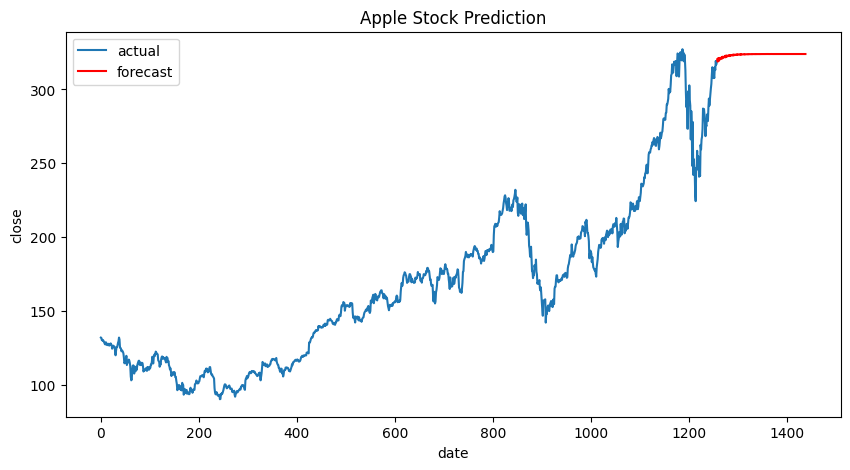

In [ ]:
# predict the next 180 days
forecast=model.predict(start=len(df["close"]),end=len(df["close"])+180)
forecast

# plot forecast
plt.figure(figsize=(10,5))
plt.plot(df['close'],label='actual')
plt.plot(forecast,color='red',label='forecast')
plt.xlabel('date')
plt.ylabel('close')
plt.title('Apple Stock Prediction')
plt.legend()
plt.show()

### *By observing the above graph, red line indicates that forecasting is done after the 180 days*

# **SARIMA MODEL**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p,d,q=3,1,3
model=SARIMAX(df['close'],order=(p,d,q),seasonal_order=(p,d,q,12))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              close   No. Observations:                 1258
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood               -3333.053
Date:                            Wed, 03 Jul 2024   AIC                           6692.106
Time:                                    19:15:03   BIC                           6758.756
Sample:                                         0   HQIC                          6717.167
                                           - 1258                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8010      0.428     -1.873      0.061      -1.639       0.037
ar.L2          0.7965      0.759      1.049      0.294      -0.692       2.285
ar.L3          0.8963      0.396      2.261      0.024       0.119       1.673
ma.L1          0.7025      0.428      1.640      0.101      -0.137       1.542
ma.L2         -0.8231      0.718     -1.147      0.251      -2.230       0.583
ma.L3         -0.7757      0.344     -2.253      0.024      -1.450      -0.101
ar.S.L12      -1.0614      6.710     -0.158      0.874     -14.213      12.090
ar.S.L24      -0.1636      5.836     -0.028      0.978     -11.601      11.274
ar.S.L36       0.0152      0.278      0.055      0.956      -0.530       0.560
ma.S.L12       0.1475      6.718      0.022      0.982     -13.019      13.314
ma.S.L24      -0.8542      0.619     -1.380      0.167      -2.067       0.359
ma.S.L36      -0.2119      5.950     -0.036      0.972     -11.873      11.450
sigma2        12.0772      0.214     56.343      0.000      11.657      12.497
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):              8679.97
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               8.84   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

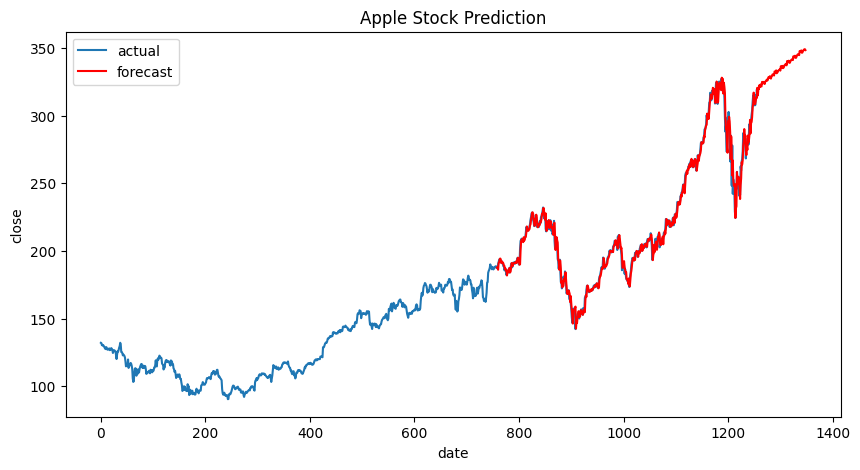

In [ ]:
predictions=model.predict(start=len(df["close"])-500,end=len(df["close"])+90)

# plot the prediction

plt.figure(figsize=(10,5))
plt.plot(df['close'],label='actual')
plt.plot(predictions,color="red",label='forecast')
plt.xlabel('date')
plt.ylabel('close')
plt.title('Apple Stock Prediction')
plt.legend()
plt.show()

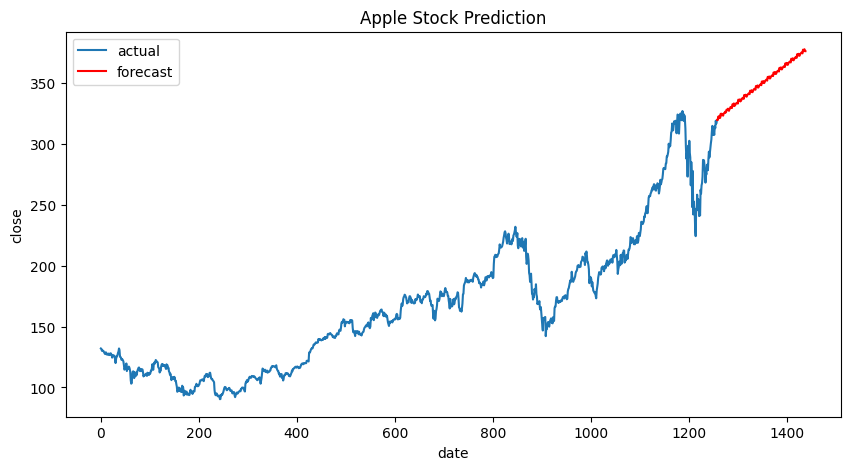

In [ ]:
predictions=model.predict(start=len(df["close"]),end=len(df["close"])+180)

# plot the prediction
plt.figure(figsize=(10,5))
plt.plot(df['close'],label='actual')
plt.plot(predictions,color="red",label='forecast')
plt.xlabel('date')
plt.ylabel('close')
plt.title('Apple Stock Prediction')
plt.legend()
plt.show()

In [ ]:
df2 = df1.copy()

In [ ]:
df2.head()

,date,close
0,2015-05-27 00:00:00+00:00,132.045
1,2015-05-28 00:00:00+00:00,131.780
2,2015-05-29 00:00:00+00:00,130.280
3,2015-06-01 00:00:00+00:00,130.535
4,2015-06-02 00:00:00+00:00,129.960


In [ ]:
df2.columns

Index(['date', 'close'], dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    1258 non-null   datetime64[ns, UTC]
 1   close   1258 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 19.8 KB


In [ ]:
from pandas.tseries.offsets import DateOffset
import pandas as pd

# Ensure 'df2' has a DateTimeIndex
if not isinstance(df2.index, pd.DatetimeIndex):
    # Assuming 'date' is a column with date information
    df2['date'] = pd.to_datetime(df2['date'])
    df2.set_index('date', inplace=True)

# Generate future dates
future_dates = [df2.index[-1] + DateOffset(days=x) for x in range(0, 180)]

# Create a new DataFrame for the future dates
future_dataset_df2 = pd.DataFrame(index=future_dates[1:], columns=df2.columns)

# Concatenate the future dataset with the present dataset
future_df2 = pd.concat([df2, future_dataset_df2])

# Forecast the data with the existing data
future_df2['forecast'] = model.predict(start=len(df2), end=len(df2) + 179, dynamic=True)

# Display the tail of the future dataset
print(future_df2.tail())

                           close  forecast
2020-11-13 00:00:00+00:00    NaN       NaN
2020-11-14 00:00:00+00:00    NaN       NaN
2020-11-15 00:00:00+00:00    NaN       NaN
2020-11-16 00:00:00+00:00    NaN       NaN
2020-11-17 00:00:00+00:00    NaN       NaN


# **Conclusion**
##* Based on the provided graph of Apple's stock price prediction, here are five points for an easy understanding conclusion: *
##* The graph shows both the actual stock prices (in blue) and the forecasted stock prices (in red) for Apple. *
##* The actual stock prices exhibit an overall upward trend, indicating that Apple's stock price has been increasing over the observed period. *
##* Towards the end of the actual data, there is a sharp increase in stock price, which is captured and extended by the forecast. *
##* The forecast (red line) continues the upward trend, suggesting confidence in the continued increase of Apple's stock price, although it should be interpreted cautiously due to inherent uncertainties in stock price predictions. *
##* To improve the accuracy of future forecasts, consider experimenting with more advanced models such as Long Short-Term Memory (LSTM) networks, or Prophet. Additionally, perform further hyperparameter tuning and include more recent data to better capture the current market trends. *
